<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_RIDGE_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> C) AR + Ridge Regression <h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from math import log
from sklearn.preprocessing import StandardScaler

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [4]:
CPI.shape

(758, 3)

In [5]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [6]:
data.shape

(759, 104)

CPI series has already been differentiated.

In [7]:
data = data.drop([758])

In [8]:
data.isna().sum()

sasdate            0
RPI                0
W875RX1            0
DPCERA3M086SBEA    0
RETAILx            0
                  ..
DSERRG3M086SBEA    0
CES0600000008      0
CES2000000008      0
CES3000000008      0
INVEST             0
Length: 104, dtype: int64

In [9]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [10]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [11]:
data.shape, CPI.shape

((758, 104), (758, 3))

In [12]:
data = data.drop(columns = ["sasdate"]).reset_index(drop=True)

In [13]:
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [14]:
CPI_data = CPI.merge(data, left_index = True, right_index = True, how = "left")

In [15]:
CPI_data.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.001036,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-04-01,0.000345,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-05-01,0.002066,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-06-01,0.002405,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,

In [16]:
date = CPI_data["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
753,2021-12-01
754,2022-01-01
755,2022-02-01
756,2022-03-01


In [17]:
CPI_data = CPI_data.drop(columns = ["sasdate", "CPIAUCSL"])

Let's check the variance distribution for each variable.

(array([1.21118846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17591112e-05]),
 array([3.55130748e-10, 8.17696545e+02, 1.63539309e+03, 2.45308963e+03,
        3.27078618e+03, 4.08848272e+03, 4.90617927e+03, 5.72387581e+03,
        6.54157236e+03, 7.35926890e+03, 8.17696545e+03, 8.99466199e+03,
        9.81235853e+03, 1.06300551e+04, 1.14477516e+04, 1.22654482e+04]),
 <a list of 15 Patch objects>)

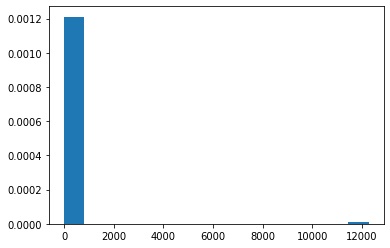

In [18]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

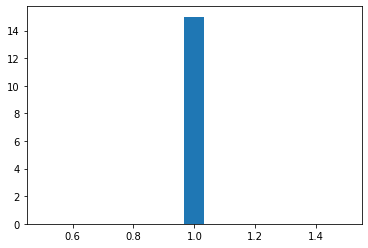

In [19]:
scaler = StandardScaler()
scaler.fit(CPI_data)
CPI_data_st = scaler.transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [20]:
CPI_data_st = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.258455,0.108583,0.193494,0.906406,0.161428,1.708178,1.151487,0.607606,0.542204,0.090167,1.061919,0.575036,2.326189,2.269714,1.334968,1.395448,-0.139663,-0.712616,1.473948,-1.721245,-0.607043,-0.222529,-0.993786,-0.140494,-0.054644,-1.373790,-0.879914,-1.245373,-0.243808,0.435923,0.737411,-0.660331,-0.520031,1.305124,1.472550,0.718124,0.277493,0.505487,0.434448,0.650888,-0.400881,0.008493,-0.906949,0.684372,-0.648127,0.633820,1.880358,1.445484,-0.611358,0.149388,1.037944,1.901051,-0.037838,-0.218580,0.275844,-0.086402,-0.080429,-27.512535,-0.195628,0.480564,-0.592245,-0.630244,-0.093484,-0.281388,0.109777,0.447258,-0.150965,-0.211325,0.096329,0.098385,1.010108,1.326117,1.386022,0.606254,0.299797,-0.182066,-0.298562,0.093097,0.063242,0.093762,0.567089,-0.349974,-0.415682,-0.293982,-0.321401,-0.201599,-0.418018,-0.259179,-0.217700,-0.126516,-0.346324,-0.294710,-0.065931,-0.569256,-0.480858,-0.565951,-0.592904,-0.441750,-0.330511,-0.656172,0.026664,-0.265273,0.008753,-0.277803
1,0.511228,0.313990,0.805420,0.794293,0.225398,1.206603,0.409919,0.264115,-0.147245,0.526848,-0.780682,0.428611,1.881897,1.926443,1.128413,1.162602,0.127988,1.121675,1.224186,1.596671,1.176390,-0.682139,-0.258032,-0.672483,-0.726815,-0.833848,-0.284880,-1.006813,-0.728833,0.800472,1.413122,0.009849,0.910253,1.584521,1.845901,0.716290,0.428575,0.770772,0.685774,1.179223,1.078754,0.188542,-0.445148,1.384444,-0.512974,0.540381,1.766551,1.139111,-0.644327,0.374570,0.457942,1.946206,-0.037990,-0.146780,0.628604,-0.142053,-0.083000,0.036293,-0.186410,-0.180152,0.540046,0.518778,0.742048,0.248350,0.007615,0.177921,0.103327,0.119407,-0.041874,-0.185894,0.623251,0.834293,0.989328,0.348965,0.085877,-0.382288,-0.503770,0.172528,0.063242,0.103739,-0.411573,-0.443053,-0.357499,-0.345572,-0.331092,-0.198692,-0.344023,-0.328912,-0.151815,-0.133104,-0.252434,0.110352,-0.580824,-0.569256,-0.480858,-0.565951,-0.612247,-0.399996,-0.327353,-0.610832,0.020776,-0.265273,1.636826,1.843727
2,0.637727,0.319252,0.754672,-0.733718,-0.261991,1.873827,1.245503,1.153644,1.329201,0.125520,1.966389,1.293361,2.010668,1.443524,2.446943,1.645410,0.050800,-0.276023,1.792707,0.894963,0.976084,-0.911944,-0.503283,0.245529,-1.807208,-2.344100,-2.674855,-1.021678,-0.479376,0.734408,1.565568,0.102817,2.083310,1.379051,1.621342,0.573148,0.228769,0.320537,1.065941,-1.216544,0.887185,-0.028888,-0.137281,0.684372,-0.377821,0.479311,1.328302,1.007219,-0.432527,0.473540,0.179135,1.140810,-0.038076,-0.247723,0.002246,-0.124489,-0.080326,0.036595,0.013207,0.448268,0.303225,0.351538,0.324282,0.368745,0.365183,0.275862,0.421194,0.486887,0.464872,0.051005,0.608923,0.807707,0.923212,0.326263,0.067002,-0.413902,-0.578846,0.080792,0.063242,0.110344,-0.506733,-0.443053,-0.357499,-0.345572,-0.321483,-0.201599,-0.399632,-0.259179,-0.218148,-0.828122,-0.346324,-0.294710,-0.070389,-0.238317,-0.480858,-0.565951,-0.445394,-0.417803,-0.328616,-0.119930,0.014970,0.215006,-0.007133,-0.559505
3,0.124012,0.259160,0.684083,1.098180,0.192646,1.270393,0.634680,0.696171,0.302525,0.550100,-0.167456,1.644133,1.865382,1.679344,0.623430,1.015758

In [21]:
CPI_data_st.shape

(758, 104)

In [22]:
CPI_data_n = CPI_data_st.copy()

In [23]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for col in CPI_data_n.columns:
  for i in lags:
    CPI_data_n[col + "_lag_" + str(i)] = CPI_data_n[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [24]:
CPI_data_n.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [25]:
CPI_data_n.shape

(758, 1248)

In [26]:
CPI_data_n = CPI_data_n.dropna()
CPI_data_n.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [27]:
CPI_data_n.shape

(747, 1248)

In [28]:
CPI_data_n = CPI_data_n.reset_index(drop = True)

In [29]:
CPI_data_n.isna().sum()

CPIAUCSL_diff      0
RPI                0
W875RX1            0
DPCERA3M086SBEA    0
RETAILx            0
                  ..
INVEST_lag_7       0
INVEST_lag_8       0
INVEST_lag_9       0
INVEST_lag_10      0
INVEST_lag_11      0
Length: 1248, dtype: int64

Function for calculate the Bayesian Information Criterion (BIC).

In [30]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. How can we select the best model? Here we select the model by alpha (regularization parameter), and choose the alpha that generates the smallest BIC. Then, we estimate 7 Ridge Models for each estimation window and select the best alpha, later we estimate the model with this alpha.
Remembering that the models are estimated with the original data and their time lags from 1 to 12 (including CPI time lags).
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the variables importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the coefficients and standard deviation of the variable.

In [31]:
X = CPI_data_n.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  best_bic = 100000
  alpha = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
  for i in alpha:
    model_val = Ridge(alpha = i)
    X_val = [item[1:] for item in history]
    y_val = [item[0] for item in history]
    model_val.fit(X_val, y_val)
    num_params = len(model_val.coef_) + 1
    yhat_bic = model_val.predict(X_val)
    mse_bic = mean_squared_error(y_val, yhat_bic)
    bic = calculate_bic(len(y_val), mse_bic, num_params)
    if bic < best_bic:
      best_bic = bic
      best_alpha = i
  model = Ridge(alpha = best_alpha)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #importance
  #Creating col names
  cols_names = CPI_data_n.columns[1:]
  #Transforming 1-D array to 2-D array
  coefs = model.coef_.reshape(1, -1)
  #Transforming into DataFrame
  coefs_df = pd.DataFrame(coefs, columns = cols_names)
  X_df = pd.DataFrame(X_history, columns = cols_names)
  #Calculating Variable Standard Deviation
  vars_std = X_df.std()
  vars_std_a = pd.DataFrame(vars_std.to_numpy().reshape(1, -1), columns = cols_names)
  #Concat std vars and coefs
  frames = [coefs_df, vars_std_a]
  importance = pd.concat(frames)
  #Importances
  importance_features = importance.prod()
  #Transforming into array
  importance_features_array = importance_features.to_numpy().reshape(1, -1)
  importance_features_array
  #Append to list
  importance_agg.append(importance_features_array[0])
  print('predicted=%f, observed=%f, window=%f, best_bic=%f, best_alpha=%f' % (yhat, obs[0], (len(history)-1), best_bic, best_alpha))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

predicted=-3.500978, observed=-1.273370, window=492.000000, best_bic=-1072.651045, best_alpha=0.010000
predicted=-0.548157, observed=-0.635296, window=492.000000, best_bic=-1047.339333, best_alpha=0.010000
predicted=1.250941, observed=0.419149, window=492.000000, best_bic=-1053.027340, best_alpha=0.010000
predicted=1.563366, observed=1.252483, window=492.000000, best_bic=-1048.348331, best_alpha=0.010000
predicted=0.899923, observed=-1.051579, window=492.000000, best_bic=-1047.822433, best_alpha=0.010000
predicted=-0.480510, observed=-1.466612, window=492.000000, best_bic=-1040.340078, best_alpha=0.010000
predicted=-0.414890, observed=0.626596, window=492.000000, best_bic=-1049.090447, best_alpha=0.010000
predicted=1.588941, observed=1.458682, window=492.000000, best_bic=-1044.830474, best_alpha=0.010000
predicted=-0.345253, observed=-2.508395, window=492.000000, best_bic=-1043.097247, best_alpha=0.010000
predicted=-0.085297, observed=0.834996, window=492.000000, best_bic=-1068.662047,

<h3> a) <h3> 

In [32]:
len(predictions), len(observed), len(test), len(X)

(255, 255, 255, 747)

In [33]:
observed = np.array(observed)
predictions = np.array(predictions)
observed = observed.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)
observed.shape, predictions.shape

((255, 1), (255, 1))

In [34]:
CPI_data_st.shape

(758, 104)

In [35]:
observed_copies =  np.repeat(observed, CPI_data_st.shape[1], axis = -1)
observed_real = scaler.inverse_transform(observed_copies)[:, 0]

In [36]:
predictions_copies =  np.repeat(predictions, CPI_data_st.shape[1], axis = -1)
predictions_real = scaler.inverse_transform(predictions_copies)[:, 0]

In [37]:
date = date[503: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-02-01
1,2001-03-01
2,2001-04-01
3,2001-05-01
4,2001-06-01


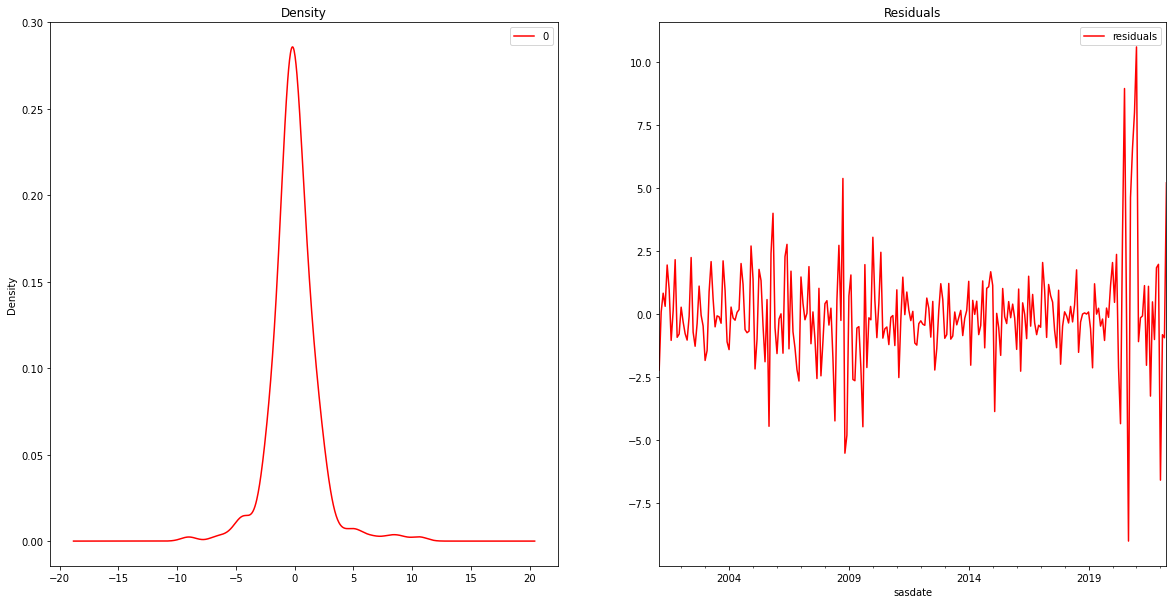

In [38]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

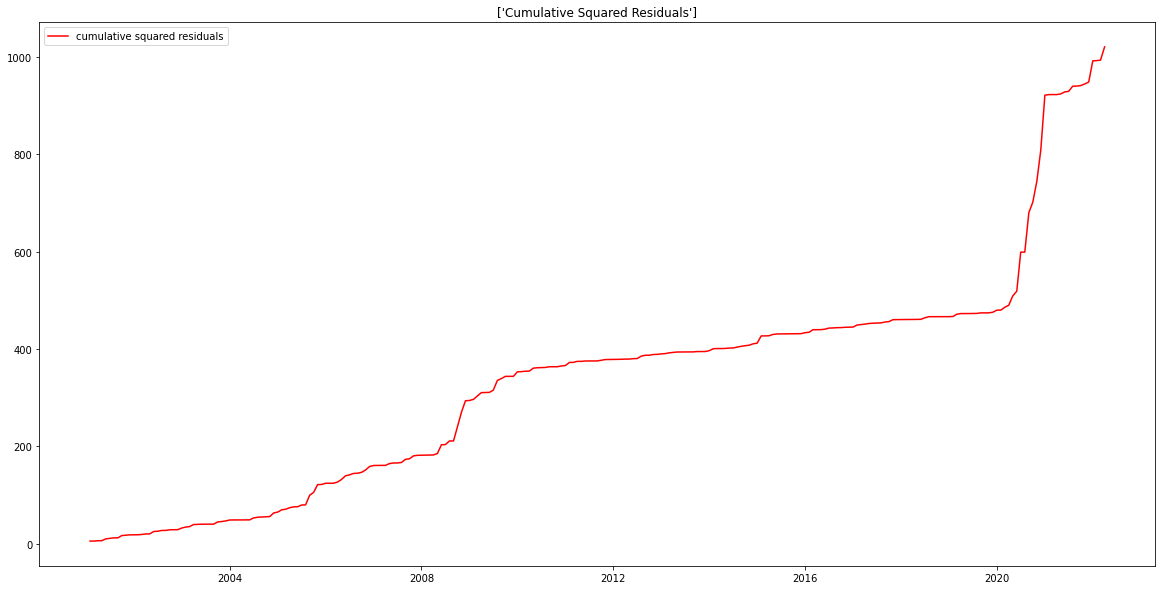

In [39]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [91]:
pred = pd.DataFrame(predictions_real)
observedd = pd.DataFrame(observed_real)

In [92]:
pred.shape, observedd.shape, date.shape

((255, 1), (255, 1), (255, 1))

In [93]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [94]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])
df.head()

,0_x,0_y
sasdate,,
2001-02-01,-0.009417,-0.003422
2001-03-01,-0.001470,-0.001705
2001-04-01,0.003371,0.001133
2001-05-01,0.004212,0.003375
2001-06-01,0.002427,-0.002825


In [95]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-02-01,-0.009417,-0.003422
2001-03-01,-0.001470,-0.001705
2001-04-01,0.003371,0.001133
2001-05-01,0.004212,0.003375
2001-06-01,0.002427,-0.002825


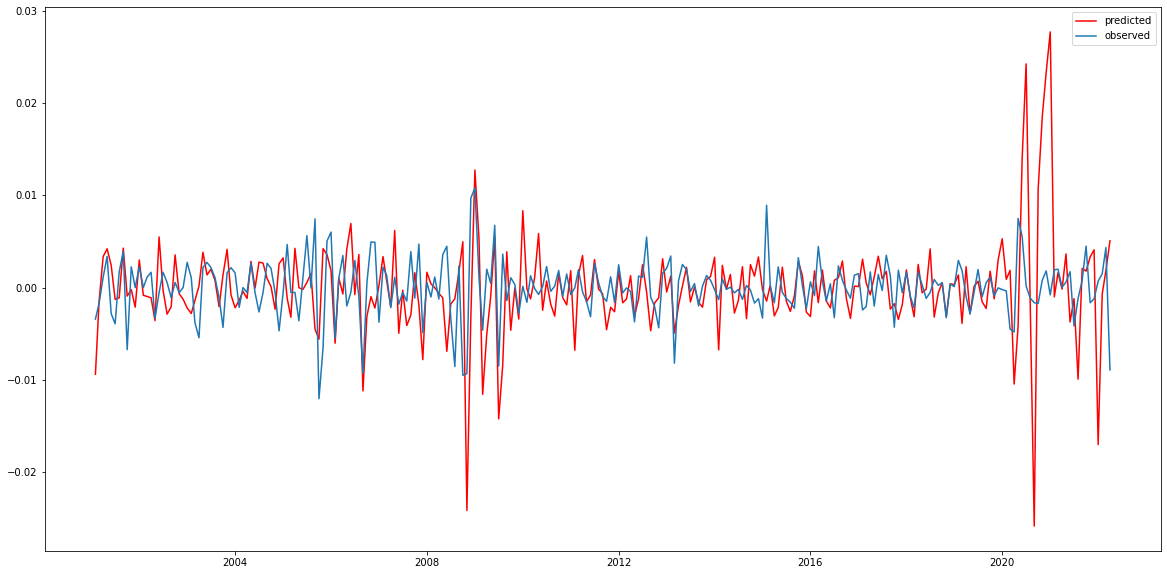

In [96]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

In [97]:
mse = mean_squared_error(observed_real, predictions_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(observed_real, predictions_real)
print('%f' % mse), print('%f' % mae), print('%f' % rmse)

0.000029
0.003455
0.005385


(None, None, None)

The Autoregressive Ridge Model seems to be more accurate than the AR and the Autoregressive PCR Model, however, it makes large errors during the pandemic period, possibly because the explanatory variables referring to the economy have presented unusual values. In addition, it is also possible to observe a jump in the errors accumulated in the period of 2008 and 2020, that is, the period of the international financial crisis and pandemic, respectively. The Ridge had an MSE of 2.67, RMSE of 1.63 and an MAE of 0.99.

<h3> b) <h3>

In [47]:
df_importances = pd.DataFrame(importance_agg, columns = cols_names)
df_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

In [48]:
df_importances.shape

(255, 1247)

In [49]:
df_rel_importances = df_importances.copy()
df_rel_importances["sum"] = df_rel_importances.abs().sum(axis = 1)
df_rel_importances["sum"].head()

0    36.555937
1    36.960779
2    36.910998
3    36.830791
4    36.785498
Name: sum, dtype: float64

In [50]:
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

The importances are transformed to percentages.

In [51]:
for col in df_rel_importances.columns[:-1]:
  df_rel_importances[col] = (df_rel_importances[col].abs()*100)/df_rel_importances["sum"]
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

In [52]:
df_rel_importances["test"] = df_rel_importances.sum(axis = 1) - df_rel_importances["sum"]
df_rel_importances["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

In [53]:
df_rel_importances.shape

(255, 1249)

In [54]:
df_rel_importances = df_rel_importances.drop(columns = ["sum", "test"])
df_rel_importances.shape

(255, 1247)

In [55]:
group_1 = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "NAPMPI", "CUMFNS"]

group_2 = ["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN", "NAPMEI",
           "CES0600000008", "CES2000000008", "CES3000000008"]

group_3 = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW", "PERMITS", "PERMITW"]

group_4 =  ["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "NAPM", "NAPMNOI", "NAPMSDI", "NAPMII", "ACOGNO", "AMDMNOx",
            "ANDENOx", "AMDMUOx", "BUSINVx", "ISRATIOx", "UMCSENTx"]

group_5 = ["M1SL", "M2SL", "M2REAL", "AMBSL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN", "NONREVSL", "CONSPI", "MZMSL",
           "DTCOLNVHFNM", "DTCTHFNM", "INVEST"] 

group_6 = ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM", "TWEXMMTH",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

group_7 = ["PPIFGS", "PPIFCG", "PPIITM", "PPICRM", "OILPRICEx", "PPICMM", "NAPMPRI", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

group_8 = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"] 

group_9 = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11", "CPIAUCSL_diff_lag_12"]

In [56]:
len(group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9)

145

Na's variables dropped in the first notebook (AR model).

In [57]:
na_cols = ['CMRMTSPLx',
 'HWI',
 'HWIURATIO',
 'PERMIT',
 'PERMITNE',
 'PERMITMW',
 'PERMITS',
 'PERMITW',
 'ACOGNO',
 'ANDENOx',
 'BUSINVx',
 'ISRATIOx',
 'NONREVSL',
 'CONSPI',
 'S&P div yield',
 'S&P PE ratio',
 'CP3Mx',
 'COMPAPFFx',
 'TWEXAFEGSMTHx',
 'UMCSENTx',
 'DTCOLNVHFNM',
 'DTCTHFNM',
 'VIXCLSx']

In [58]:
len(na_cols)

23

In [59]:
df_rel_importances.shape

(255, 1247)

Now, we aggregate the lags into the original variables. Remembering that as the variables are standardized in percentage of importance, their sum indicates the percentage of importance of the original variable and its lags.

In [60]:
lags_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
df_agg_lags = df_rel_importances.copy()
for col in df_agg_lags.columns[0: 103]:
  for i in lags_range:
    df_agg_lags[col] = df_agg_lags[col] + df_agg_lags[col + "_lag_" + str(i)]
    df_agg_lags = df_agg_lags.drop(columns = [col + "_lag_" + str(i)])

In [61]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11
0,0.446140,0.993691,1.039249,0.956863,0.882396,0.641850,0.457545,0.522056,0.844844,1.263228,0.554549,1.038476,1.091620,0.874065,0.851839,0.991906,1.267426,1.048812,1.252478,0.324991,0.420522,0.993187,0.787193,1.385600,0.771261,0.913616,1.190506,0.644960,0.258984,0.529746,1.153577,1.122471,0.733711,1.244035,1.039909,0.225807,0.546574,1.354879,0.470887,0.965303,1.626431,0.565386,1.446970,0.987044,0.227026,0.806308,0.791693,1.058125,1.095143,1.184158,1.981423,0.000008,0.267783,1.726373,0.017499,0.004384,6.430611e-02,0.250688,1.136389,0.601018,0.944375,1.195264,1.552172,1.840676,1.054154,1.265208,1.266402,1.555943,1.014274,0.933838,0.650778,0.687384,0.384878,0.317585,0.285880,0.230586,0.874158,1.599244,1.352469,0.939422,1.127922,1.120621,1.045720,0.681662,1.610046,1.113041,0.656881,0.213392,2.133061,0.437601,0.722346,1.964804,1.515731,0.467644,1.316133,1.168476,1.858086,0.591638,1.603316,1.470418,2.498756,1.441977,1.005350,0.846507,0.376464,0.460468,0.003710,0.044659,0.183743,0.033849,0.149076,0.000760,0.042862,0.213680
1,0.420829,0.986722,1.062910,0.985816,0.855178,0.658211,0.445794,0.571015,0.887567,1.274356,0.548450,0.952014,1.072995,0.875895,0.861225,1.043373,1.299467,1.030077,1.300504,0.309524,0.397439,1.023640,0.726382,1.347626,0.772236,0.938080,1.081365,0.652302,0.253201,0.500098,1.102471,1.151108,0.699369,1.200587,1.030872,0.209242,0.499984,1.401023,0.458827,0.980734,1.482100,0.597000,1.493097,0.978691,0.271198,0.828619,0.754506,1.125433,1.092030,1.130296,2.019239,0.000009,0.279723,1.795034,0.016920,0.004531,6.355469e-07,0.249691,1.112420,0.640663,0.921753,1.246206,1.603329,1.826670,1.116088,1.319751,1.351498,1.563594,1.111572,0.963838,0.688924,0.709674,0.354836,0.300715,0.314757,0.250024,0.921398,1.618109,1.362697,0.941593,1.150812,1.120238,1.012222,0.581508,1.560233,1.094160,0.702266,0.214594,2.021875,0.424457,0.695390,1.936235,1.560859,0.499064,1.377636,1.229638,1.867690,0.576106,1.568277,1.538286,2.414062,1.482331,0.932272,0.809577,0.373435,0.447526,0.001019,0.033140,0.151631,0.008933,0.118258,0.013621,0.044851,0.211065
2,0.418149,0.969452,1.085185,0.992816,0.812513,0.642050,0.451852,0.565637,0.885181,1.278969,0.522085,0.978902,1.094246,0.853685,0.861896,1.030906,1.269923,1.041791,1.287167,0.299282,0.401810,1.012485,0.728488,1.362627,0.793782,0.938786,1.093956,0.669327,0.249515,0.467037,1.125900,1.106017,0.659551,1.149535,1.039543,0.209587,0.509386,1.348547,0.443828,1.011198,1.521495,0.591436,1.510957,0.926964,0.281061,0.863624,0.761208,1.102439,1.133285,1.149203,1.983313,0.000008,0.282059,1.789784,0.016552,0.004623,6.416597e-07,0.244993,1.101921,0.652160,0.934130,1.296821,1.606318,1.830794,1.113067,1.348286,1.317435,1.588348,1.123373,0.944420,0.723598,0.703230,0.371939,0.312356,0.336169,0.263487,0.915166,1.600964,1.351475,0.938908,1.131234,1.096405,1.017247,0.564890,1.609466,1.083728,0.696023,0.213178,2.047038,0.427107,0.689435,1.94

In [62]:
df_agg_lags.shape

(255, 114)

Adding the columns per row to confirm the total is 100.

In [63]:
df_agg_lags["test"] = df_agg_lags.sum(axis = 1)
df_agg_lags["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

Now, we need to check that the per-group variables provided by the St. Louis match the base variables.

Names of the database variables

In [64]:
data_cols_test = df_agg_lags.columns[0:103]
data_cols_test_df = pd.DataFrame(data_cols_test, columns = ["data"])
data_cols_test_df = data_cols_test_df.reindex(sorted(data_cols_test_df.columns), axis=1)
data_cols_test_df.head()

,data
0,RPI
1,W875RX1
2,DPCERA3M086SBEA
3,RETAILx
4,INDPRO


Name of the per-group variables provided by the Fed

In [65]:
groups_cols = group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9
groups_cols_df = pd.DataFrame(groups_cols, columns = ["groups"])
groups_cols_df = groups_cols_df.reindex(sorted(groups_cols_df.columns), axis=1)
groups_cols_df.head()

,groups
0,RPI
1,W875RX1
2,INDPRO
3,IPFPNSS
4,IPFINAL


In [66]:
mg_left = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "left")
mg_right = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "right")

In [67]:
mg_left["test"] = np.where(mg_left["data"] == mg_left["groups"], 1, 0)

In [68]:
mg_right["test"] = np.where(mg_right["data"] == mg_right["groups"], 1, 0)

In [69]:
test_left = mg_left[mg_left["test"] == 0]
test_left.shape

(8, 3)

We have 8 variables in database that doesnt match the Fed groups.

In [70]:
test_right = mg_right[mg_right["test"] == 0]
test_right.shape

(38, 3)

We have 38 variables from the Fed groups that don't match the variable names in the database.

In [71]:
test_left

,data,groups,test
15,IPB51222S,NaN,0
54,BOGMBASE,NaN,0
80,WPSFD49207,NaN,0
81,WPSFD49502,NaN,0
82,WPSID61,NaN,0
83,WPSID62,NaN,0
90,CUSR0000SAD,NaN,0
93,CUSR0000SA0L2,NaN,0


Names of the 8 variables that are in the database and not in the fed groups.

In [72]:
test_right

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0
54,NaN,PERMIT,0
55,NaN,PERMITNE,0
56,NaN,PERMITMW,0
57,NaN,PERMITS,0
58,NaN,PERMITW,0


Names of 38 variables that are in Fed group and not are in Database.

In [73]:
na_cols_df = pd.DataFrame(na_cols, columns = ["Na"])
na_cols_df

,Na
0,CMRMTSPLx
1,HWI
2,HWIURATIO
3,PERMIT
4,PERMITNE
5,PERMITMW
6,PERMITS
7,PERMITW
8,ACOGNO
9,ANDENOx


Above, 22 variables has been dropped in the first notebook (AR). Below we can see the variables that were dropped and that are also in the Fed groups.

In [74]:
test_right_na = pd.merge(test_right, na_cols_df, left_on = "groups", right_on = "Na", how = "left")
test_right_na = test_right_na.drop(columns= ["data", "test"])
test_right_na

,groups,Na
0,IPB51222s,NaN
1,NAPMPI,NaN
2,HWI,HWI
3,HWIURATIO,HWIURATIO
4,NAPMEI,NaN
5,PERMIT,PERMIT
6,PERMITNE,PERMITNE
7,PERMITMW,PERMITMW
8,PERMITS,PERMITS
9,PERMITW,PERMITW


In [75]:
test_right_na["test"] =  np.where(test_right_na["groups"] == test_right_na["Na"], 1, 0)
test_right_na

,groups,Na,test
0,IPB51222s,NaN,0
1,NAPMPI,NaN,0
2,HWI,HWI,1
3,HWIURATIO,HWIURATIO,1
4,NAPMEI,NaN,0
5,PERMIT,PERMIT,1
6,PERMITNE,PERMITNE,1
7,PERMITMW,PERMITMW,1
8,PERMITS,PERMITS,1
9,PERMITW,PERMITW,1


In [76]:
test_right_no_na = test_right_na[test_right_na["test"] == 0]
test_right_no_na

,groups,Na,test
0,IPB51222s,NaN,0
1,NAPMPI,NaN,0
4,NAPMEI,NaN,0
11,NAPM,NaN,0
12,NAPMNOI,NaN,0
13,NAPMSDI,NaN,0
14,NAPMII,NaN,0
20,AMBSL,NaN,0
23,MZMSL,NaN,0
28,TWEXMMTH,NaN,0


These are the variables for the Fed groups that are not actually in the database.

In [77]:
test_left = test_left.drop(columns = ["groups", "test"])
test_left

,data
15,IPB51222S
54,BOGMBASE
80,WPSFD49207
81,WPSFD49502
82,WPSID61
83,WPSID62
90,CUSR0000SAD
93,CUSR0000SA0L2


We can see that some variables that are in the base are with different names from the variables of the groups, let's change these names, for the others we will create a tenth group.

In [78]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,test
0,0.446140,0.993691,1.039249,0.956863,0.882396,0.641850,0.457545,0.522056,0.844844,1.263228,0.554549,1.038476,1.091620,0.874065,0.851839,0.991906,1.267426,1.048812,1.252478,0.324991,0.420522,0.993187,0.787193,1.385600,0.771261,0.913616,1.190506,0.644960,0.258984,0.529746,1.153577,1.122471,0.733711,1.244035,1.039909,0.225807,0.546574,1.354879,0.470887,0.965303,1.626431,0.565386,1.446970,0.987044,0.227026,0.806308,0.791693,1.058125,1.095143,1.184158,1.981423,0.000008,0.267783,1.726373,0.017499,0.004384,6.430611e-02,0.250688,1.136389,0.601018,0.944375,1.195264,1.552172,1.840676,1.054154,1.265208,1.266402,1.555943,1.014274,0.933838,0.650778,0.687384,0.384878,0.317585,0.285880,0.230586,0.874158,1.599244,1.352469,0.939422,1.127922,1.120621,1.045720,0.681662,1.610046,1.113041,0.656881,0.213392,2.133061,0.437601,0.722346,1.964804,1.515731,0.467644,1.316133,1.168476,1.858086,0.591638,1.603316,1.470418,2.498756,1.441977,1.005350,0.846507,0.376464,0.460468,0.003710,0.044659,0.183743,0.033849,0.149076,0.000760,0.042862,0.213680,100.0
1,0.420829,0.986722,1.062910,0.985816,0.855178,0.658211,0.445794,0.571015,0.887567,1.274356,0.548450,0.952014,1.072995,0.875895,0.861225,1.043373,1.299467,1.030077,1.300504,0.309524,0.397439,1.023640,0.726382,1.347626,0.772236,0.938080,1.081365,0.652302,0.253201,0.500098,1.102471,1.151108,0.699369,1.200587,1.030872,0.209242,0.499984,1.401023,0.458827,0.980734,1.482100,0.597000,1.493097,0.978691,0.271198,0.828619,0.754506,1.125433,1.092030,1.130296,2.019239,0.000009,0.279723,1.795034,0.016920,0.004531,6.355469e-07,0.249691,1.112420,0.640663,0.921753,1.246206,1.603329,1.826670,1.116088,1.319751,1.351498,1.563594,1.111572,0.963838,0.688924,0.709674,0.354836,0.300715,0.314757,0.250024,0.921398,1.618109,1.362697,0.941593,1.150812,1.120238,1.012222,0.581508,1.560233,1.094160,0.702266,0.214594,2.021875,0.424457,0.695390,1.936235,1.560859,0.499064,1.377636,1.229638,1.867690,0.576106,1.568277,1.538286,2.414062,1.482331,0.932272,0.809577,0.373435,0.447526,0.001019,0.033140,0.151631,0.008933,0.118258,0.013621,0.044851,0.211065,100.0
2,0.418149,0.969452,1.085185,0.992816,0.812513,0.642050,0.451852,0.565637,0.885181,1.278969,0.522085,0.978902,1.094246,0.853685,0.861896,1.030906,1.269923,1.041791,1.287167,0.299282,0.401810,1.012485,0.728488,1.362627,0.793782,0.938786,1.093956,0.669327,0.249515,0.467037,1.125900,1.106017,0.659551,1.149535,1.039543,0.209587,0.509386,1.348547,0.443828,1.011198,1.521495,0.591436,1.510957,0.926964,0.281061,0.863624,0.761208,1.102439,1.133285,1.149203,1.983313,0.000008,0.282059,1.789784,0.016552,0.004623,6.416597e-07,0.244993,1.101921,0.652160,0.934130,1.296821,1.606318,1.830794,1.113067,1.348286,1.317435,1.588348,1.123373,0.944420,0.723598,0.703230,0.371939,0.312356,0.336169,0.263487,0.915166,1.600964,1.351475,0.938908,1.131234,1.096405,1.017247,0.564890,1.609466,1.083728,0.696023,0.213178,2.047038,0.427

In [79]:
df_agg_lags = df_agg_lags.rename(columns = {"IPB51222S" : "IPB51222s", "CUSR0000SAD" : "CUUR0000SAD", "CUSR0000SA0L2" : "CUUR0000SA0L2"})

Now, we need drop variables names in groups that are in the Fed groups and are not in the database.

In [80]:
test_right.head()

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0


In [81]:
variables_to_drop = test_right.drop(columns = ["test", "data"])
variables_to_drop = variables_to_drop.reset_index(drop = True)
variables_to_drop

,groups
0,IPB51222s
1,NAPMPI
2,HWI
3,HWIURATIO
4,NAPMEI
5,PERMIT
6,PERMITNE
7,PERMITMW
8,PERMITS
9,PERMITW


In [82]:
variables_to_drop = variables_to_drop.drop(labels = [0,34,35], axis = 0)
variables_to_drop

,groups
1,NAPMPI
2,HWI
3,HWIURATIO
4,NAPMEI
5,PERMIT
6,PERMITNE
7,PERMITMW
8,PERMITS
9,PERMITW
10,CMRMTSPLx


Here are the updated groups. In which the variables that were in the Fed and were not in the database had their names excluded. The variables that were dropped in the first notebook because they had null values also had their names excluded. Variables that were under different names were updated in the base and those that were in the base and were not in the Fed were included in a tenth group.

In [83]:
Output_and_Income = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"]

Labor_Market = ["CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN",
           "CES0600000008", "CES2000000008", "CES3000000008"]

Consumption_and_Orders = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW"]

Orders_and_Inventories =  ["DPCERA3M086SBEA", "RETAILx", "AMDMNOx",
            "AMDMUOx"]

Money_and_Credit = ["M1SL", "M2SL", "M2REAL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
           "INVEST"] 

Interest_and_Exhange = ["FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

Prices = ["OILPRICEx", "PPICMM", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

Stock_Market = ["S&P 500", "S&P: indust"] 

Lags_CPI = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11"]

Others = ["BOGMBASE", "WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62"]

In [84]:
groups = [Output_and_Income, Labor_Market, Consumption_and_Orders, Orders_and_Inventories, Money_and_Credit,
          Interest_and_Exhange, Prices, Stock_Market, Lags_CPI, Others]

list_groups = []

for group in groups:
  g = df_agg_lags[group].sum(axis = 1)
  list_groups.append(g)

list_groups_transpose = np.transpose(list_groups)
list_groups_df = pd.DataFrame(list_groups_transpose)
list_groups_df

list_groups_df["test"] = list_groups_df.sum(axis = 1)
list_groups_df

,0,1,2,3,4,5,6,7,8,9,test
0,13.770442,28.367181,3.978296,5.161694,4.455281,19.000315,17.372196,1.545394,2.355777,3.993423,100.0
1,13.783169,28.022182,4.071786,5.198261,4.373680,19.565270,17.328481,1.562416,2.213056,3.881699,100.0
2,13.677238,27.970633,4.141615,5.210517,4.346059,19.686155,17.365435,1.586291,2.189731,3.826327,100.0
3,13.688598,27.764319,4.265072,5.173826,4.359331,19.622089,17.376344,1.639270,2.201274,3.909877,100.0
4,13.644094,27.858977,4.243731,5.200645,4.380502,19.552741,17.369785,1.640250,2.175204,3.934071,100.0
...,...,...,...,...,...,...,...,...,...,...,...
250,15.464205,28.920527,4.723908,4.599848,9.056972,14.940237,14.116819,1.765678,1.832652,4.579155,100.0
251,15.570809,28.999672,4.717011,4.598807,9.060973,14.837840,14.075589,1.746399,1.823267,4.569633,100.0
252,16.033094,28.744975,4.671504,4.668712,9.027111,14.652183,14.099312,1.777835,1.849081,4.476192,100.0
253,16.058037,28.598691,4.727950,4.649496,9.059361,14.447262,14.353938,1.781072,1.850787,4.473407,100.0


Now we are ready to do analysis. This table shows the importance porcentage aggregate by group per estimation. We have 10 groups and 249 estimations.

In [85]:
groups_importances = list_groups_df.drop(columns = ["test"])
groups_importances = groups_importances.rename(columns = {0 : "Output_and_Income", 1 : "Labor_Market", 2 : "Consumption_and_Orders",
                                                          3 : "Orders_and_Inventories", 4 : "Money_and_Credit", 5 : "Interest_and_Exhange",
                                                          6 : "Prices", 7 : "Stock_Market", 8 : "Lags_CPI", 9 : "Others"})
groups_importances.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
0,13.770442,28.367181,3.978296,5.161694,4.455281,19.000315,17.372196,1.545394,2.355777,3.993423
1,13.783169,28.022182,4.071786,5.198261,4.373680,19.565270,17.328481,1.562416,2.213056,3.881699
2,13.677238,27.970633,4.141615,5.210517,4.346059,19.686155,17.365435,1.586291,2.189731,3.826327
3,13.688598,27.764319,4.265072,5.173826,4.359331,19.622089,17.376344,1.639270,2.201274,3.909877
4,13.644094,27.858977,4.243731,5.200645,4.380502,19.552741,17.369785,1.640250,2.175204,3.934071


In [86]:
date.shape, groups_importances.shape

((255, 1), (255, 10))

In [87]:
groups_importances_date = date.merge(groups_importances, left_index = True, right_index = True, how = "left")
groups_importances_date.index = pd.DatetimeIndex(groups_importances_date["sasdate"])
groups_importances_date = groups_importances_date.drop(columns = ["sasdate"])
groups_importances_date.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
sasdate,,,,,,,,,,
2001-02-01,13.770442,28.367181,3.978296,5.161694,4.455281,19.000315,17.372196,1.545394,2.355777,3.993423
2001-03-01,13.783169,28.022182,4.071786,5.198261,4.373680,19.565270,17.328481,1.562416,2.213056,3.881699
2001-04-01,13.677238,27.970633,4.141615,5.210517,4.346059,19.686155,17.365435,1.586291,2.189731,3.826327
2001-05-01,13.688598,27.764319,4.265072,5.173826,4.359331,19.622089,17.376344,1.639270,2.201274,3.909877
2001-06-01,13.644094,27.858977,4.243731,5.200645,4.380502,19.552741,17.369785,1.640250,2.175204,3.934071


In [88]:
groups_importances_date.shape

(255, 10)

In [89]:
groups_importances_date.isna().sum()

Output_and_Income         0
Labor_Market              0
Consumption_and_Orders    0
Orders_and_Inventories    0
Money_and_Credit          0
Interest_and_Exhange      0
Prices                    0
Stock_Market              0
Lags_CPI                  0
Others                    0
dtype: int64

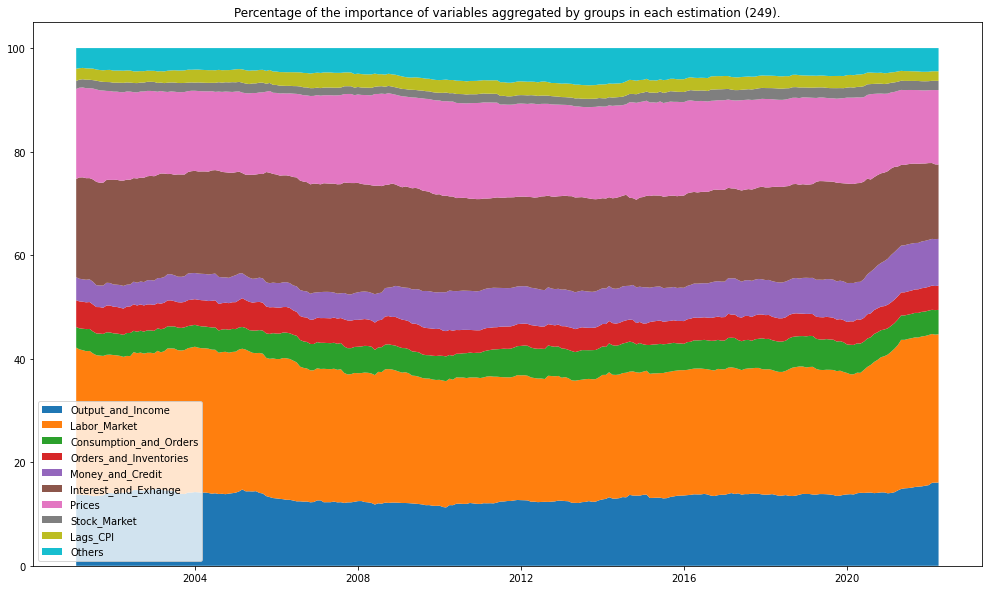

In [90]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

plt.stackplot(groups_importances_date.index, groups_importances_date["Output_and_Income"], groups_importances_date["Labor_Market"], groups_importances_date["Consumption_and_Orders"],
              groups_importances_date["Orders_and_Inventories"], groups_importances_date["Money_and_Credit"], groups_importances_date["Interest_and_Exhange"], groups_importances["Prices"],
              groups_importances_date["Stock_Market"], groups_importances_date["Lags_CPI"], groups_importances_date["Others"], labels = groups_importances.columns)

plt.title('Percentage of the importance of variables aggregated by groups in each estimation (249).')
plt.legend(loc= "lower left")

It is worth noting how the Labor Market group showed a higher percentage importance after the pandemic period.